<a href="https://colab.research.google.com/github/RoCas9/ML_final_project/blob/main/Roberta_Last_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Forecasting Jet Demand as a function of flights volume and industrial production**

Dataset:
Monthly time series data range 2018-2020.             

1) Eurozone Jet Demand, source: JODI 

2) European number of flights scheduled and % operated, source: Eurocontrol

3) Eurozone Industrial production index, source: Bloomberg

In [181]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [182]:
flights = pd.read_excel("/content/drive/MyDrive/data/Eurocontrol dataset/data-snapshot-1.xlsx",sheet_name="Data")

### **- Analysing Flights Dataframe**

In [183]:
flights.head()

,Date,NON_MATCHED_SCHEDULES,TOTAL_FLIGHT_PLANS,FLIGHT_PLANS_WITH_SCHEDULE,Total Schedules,NON_OPERATED_SCHED,% Operated,Unnamed: 7
0,2018-01-01,915,20350,18703,19618,0.046641,0.953359,NaN
1,2018-01-02,1005,25493,22513,23518,0.042733,0.957267,NaN
2,2018-01-03,1356,24590,21943,23299,0.058200,0.941800,NaN
3,2018-01-04,1083,25131,22307,23390,0.046302,0.953698,NaN
4,2018-01-05,998,25996,22886,23884,0.041785,0.958215,NaN


In [184]:
tf=flights["TOTAL_FLIGHT_PLANS"]
tf

0       20350
1       25493
2       24590
3       25131
4       25996
        ...  
1094    10892
1095     6962
1096     6529
1097     9821
1098    12196
Name: TOTAL_FLIGHT_PLANS, Length: 1099, dtype: int64

In [185]:
tfn = tf.astype(int)
print("The total number of flights from 2018 to 2020 is",tfn.sum())
#how to change the format of the number?

The total number of flights from 2018 to 2020 is 27134161


### **- Creating a Datetime index**

In [186]:
flights.set_index("Date",inplace=True)


In [187]:
flights.index=pd.to_datetime(flights.index)

### **- Switching Datatime Index Frequency from daily to monthly**


In [188]:
Month=flights.resample("1M").mean()

In [189]:
Month.head()

,NON_MATCHED_SCHEDULES,TOTAL_FLIGHT_PLANS,FLIGHT_PLANS_WITH_SCHEDULE,Total Schedules,NON_OPERATED_SCHED,% Operated,Unnamed: 7
Date,,,,,,,
2018-01-31,970.870968,24742.580645,21687.193548,22658.064516,0.042760,0.957240,NaN
2018-02-28,1087.714286,25667.607143,22333.321429,23421.035714,0.046320,0.953680,NaN
2018-03-31,1324.806452,26976.290323,23276.129032,24600.935484,0.053773,0.946227,NaN
2018-04-30,1365.433333,29889.733333,25944.033333,27309.466667,0.050097,0.949903,NaN
2018-05-31,1420.935484,31502.000000,27299.806452,28720.741935,0.049410,0.950590,NaN


### **- Seasonality check**

In [190]:
Month["TOTAL_FLIGHT_PLANS"] = Month["TOTAL_FLIGHT_PLANS"].astype(int)

In [191]:
Month["DATES"] = Month.index.astype(str)

In [192]:
Month["Months"] = Month.DATES.str.split("-").apply(lambda x : x[1])

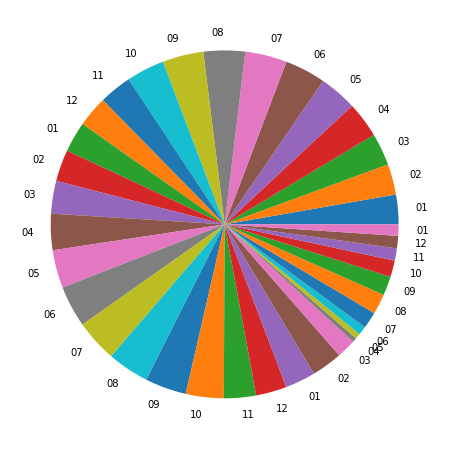

In [193]:
plt.figure(figsize=(12,8))
plt.pie(Month["TOTAL_FLIGHT_PLANS"], labels=Month["Months"]);

In [194]:
number_of_flights_monthly = Month.groupby("Months")["TOTAL_FLIGHT_PLANS"].sum()
number_of_flights_monthly

Months
01    85118
02    77810
03    70449
04    63763
05    67824
06    76091
07    84127
08    86550
09    84728
10    77223
11    64393
12    61818
Name: TOTAL_FLIGHT_PLANS, dtype: int64

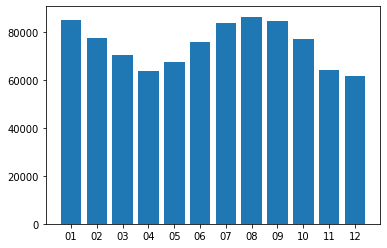

In [195]:
plt.bar(number_of_flights_monthly.index, number_of_flights_monthly,);

In [196]:
#it would be interesting to double check the seasonality for a subset of the timeframe ie. 2018 to 2020 with 2020 excluded, thus excludig covid shock

### **- Adding a new dataframe with Jet Demand and Industrial Production**


In [197]:
JetandIndustry = pd.read_excel("/content/drive/MyDrive/data/EU Jet Fuel Demand EUO5DEEA Index Industrial Production EUIPEMU Index   .xlsx")

In [198]:
JetandIndustry.head()

,Date,Jet Demand MT,Industrial Production
0,12/31/2020,1872.0,95.6
1,11/30/2020,1397.0,107.9
2,10/31/2020,1511.0,106.9
3,9/30/2020,1644.0,102.1
4,8/31/2020,1935.0,81.8


In [199]:
JetandIndustry.set_index("Date",inplace=True)

In [200]:
JetandIndustry.index=pd.to_datetime(JetandIndustry.index)

In [201]:
JandI=JetandIndustry.sort_index(ascending=True)

In [202]:
JandI.head()

,Jet Demand MT,Industrial Production
Date,,
2018-01-31,3272.0,102.6
2018-02-28,3075.0,102.0
2018-03-31,3315.0,112.9
2018-04-30,3386.0,103.8
2018-05-31,3673.0,105.9


### **- Merging the two datasets**

In [203]:
Month["Jet"]=JandI['Jet Demand MT ']

In [204]:
Month["Ind"]=JandI['Industrial Production ']

In [205]:
Month.head()

,NON_MATCHED_SCHEDULES,TOTAL_FLIGHT_PLANS,FLIGHT_PLANS_WITH_SCHEDULE,Total Schedules,NON_OPERATED_SCHED,% Operated,Unnamed: 7,DATES,Months,Jet,Ind
Date,,,,,,,,,,,
2018-01-31,970.870968,24742,21687.193548,22658.064516,0.042760,0.957240,NaN,2018-01-31,01,3272.0,102.6
2018-02-28,1087.714286,25667,22333.321429,23421.035714,0.046320,0.953680,NaN,2018-02-28,02,3075.0,102.0
2018-03-31,1324.806452,26976,23276.129032,24600.935484,0.053773,0.946227,NaN,2018-03-31,03,3315.0,112.9
2018-04-30,1365.433333,29889,25944.033333,27309.466667,0.050097,0.949903,NaN,2018-04-30,04,3386.0,103.8
2018-05-31,1420.935484,31502,27299.806452,28720.741935,0.049410,0.950590,NaN,2018-05-31,05,3673.0,105.9


### **- Renaming and cleaning the dataset**

In [206]:
DATA = Month.drop(columns=["TOTAL_FLIGHT_PLANS","NON_MATCHED_SCHEDULES","FLIGHT_PLANS_WITH_SCHEDULE","NON_OPERATED_SCHED","Unnamed: 7"])


In [207]:
DATA.head()

,Total Schedules,% Operated,DATES,Months,Jet,Ind
Date,,,,,,
2018-01-31,22658.064516,0.957240,2018-01-31,01,3272.0,102.6
2018-02-28,23421.035714,0.953680,2018-02-28,02,3075.0,102.0
2018-03-31,24600.935484,0.946227,2018-03-31,03,3315.0,112.9
2018-04-30,27309.466667,0.949903,2018-04-30,04,3386.0,103.8
2018-05-31,28720.741935,0.950590,2018-05-31,05,3673.0,105.9


In [208]:
#DATA> 0
#before working now giving me an error

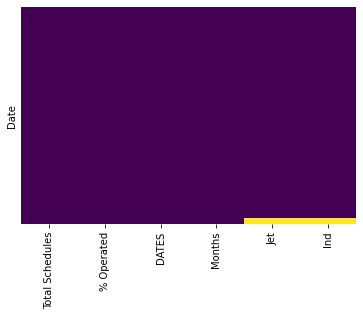

In [209]:
sns.heatmap(DATA.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [210]:
DATA.loc["2021-01-31"]

Total Schedules       9563.67
% Operated           0.815931
DATES              2021-01-31
Months                     01
Jet                       NaN
Ind                       NaN
Name: 2021-01-31 00:00:00, dtype: object

In [211]:
DATA.drop(pd.Timestamp('2021-01-31'),inplace=True)

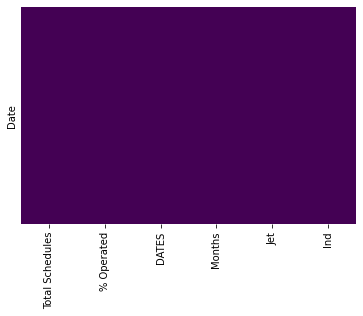

In [212]:
sns.heatmap(DATA.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [213]:
operated=DATA['% Operated'].astype(float)

In [214]:
operated.mean()
print("On average the % operated of the number of flights plan is",operated.mean())

On average the % operated of the number of flights plan is 0.9011482522093313


In [215]:
# DATA[(DATA['% Operated'] > 0.94)]
# how to count the number of % operated with a value greater than 0.94 , value count ? iteration? 

### **- Linear Regression**

In [216]:
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression


In [217]:
DATA['FLIGHTS']=DATA['Total Schedules']

In [218]:
DATA.head()

,Total Schedules,% Operated,DATES,Months,Jet,Ind,FLIGHTS
Date,,,,,,,
2018-01-31,22658.064516,0.957240,2018-01-31,01,3272.0,102.6,22658.064516
2018-02-28,23421.035714,0.953680,2018-02-28,02,3075.0,102.0,23421.035714
2018-03-31,24600.935484,0.946227,2018-03-31,03,3315.0,112.9,24600.935484
2018-04-30,27309.466667,0.949903,2018-04-30,04,3386.0,103.8,27309.466667
2018-05-31,28720.741935,0.950590,2018-05-31,05,3673.0,105.9,28720.741935


In [225]:

model = smf.ols(formula='FLIGHTS ~ Jet', data=DATA)
model = model.fit()

In [220]:
model.params

Intercept   -1105.214670
Jet             7.798795
dtype: float64

In [221]:
jet_pred = model.predict()

In [228]:
type(DATA['FLIGHTS'])

pandas.core.series.Series

In [ ]:
new_X=25000

model.predict({"FLIGHTS": new_X})
#error weirf functioning of ols 

In [229]:
predictors = ["Ind","FLIGHTS"]
X =DATA[predictors]
y = DATA["Jet"]

In [230]:
lm = LinearRegression()
model = lm.fit(X,y)

In [231]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 776.8080673104032
betas = [-5.43698879  0.12453291]


Model : Jet Demand = 776.8  -5.43(IndustrialProduction) +0.12(Flightsvolume)

In [232]:
model.predict(X)

array([3040.64762646, 3138.9248399 , 3226.59800871, 3613.37586468,
       3777.708398  , 4024.92430853, 4159.92375374, 4237.27719073,
       4082.8215525 , 3777.20355147, 3276.52023328, 3194.69623815,
       3162.21860176, 3235.68690753, 3263.09441901, 3629.90496349,
       3811.80276296, 4074.06677393, 4175.79488171, 4248.2395465 ,
       4101.55006898, 3739.70917724, 3222.9324915 , 3194.72300967,
       3115.98557732, 3182.72163229, 2582.74350483,  852.92178994,
        890.03475095, 1005.1740214 , 1654.05594348, 2169.36463259,
       1929.97164427, 1707.76088357, 1309.05192495, 1400.49709539])

In [233]:
newValuesToAdjust_X = [[101, 22500]]
print("If IndustrialProductionIndex hits 112 and flights volume 25k, the monthly Jet Demand could be around", model.predict(newValuesToAdjust_X))

If IndustrialProductionIndex hits 112 and flights volume 25k, the monthly Jet Demand could be around [3029.66257506]


In [234]:
DATA["Jet"].mean()

3033.6285714285714

In [235]:
DATA["FLIGHTS"].mean()

22553.43395174532

In [236]:
DATA['Ind'].mean()

101.49444444444445

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


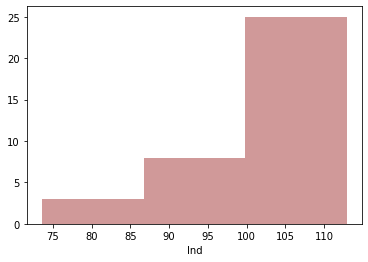

In [237]:
sns.distplot(DATA["Ind"],kde=False, color="darkred",bins=3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


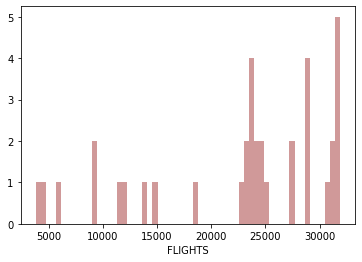

In [240]:
sns.distplot(DATA["FLIGHTS"],kde=False, color="darkred",bins=60 )


In [241]:
def impute_season(cols):
  Date=cols[0]
  Season=cols[1]
  if Date =="2018-01-31"
    return winter 
# how to adapt for a datetime.index and for intervals

SyntaxError: ignored

### **- Training,testing and evaluation**

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split(DATA.drop("Jet",axis=1),DATA["Jet"],test_size=0.30,random_state=101)

In [245]:
DATA.head()

,Total Schedules,% Operated,DATES,Months,Jet,Ind,FLIGHTS
Date,,,,,,,
2018-01-31,22658.064516,0.957240,2018-01-31,01,3272.0,102.6,22658.064516
2018-02-28,23421.035714,0.953680,2018-02-28,02,3075.0,102.0,23421.035714
2018-03-31,24600.935484,0.946227,2018-03-31,03,3315.0,112.9,24600.935484
2018-04-30,27309.466667,0.949903,2018-04-30,04,3386.0,103.8,27309.466667
2018-05-31,28720.741935,0.950590,2018-05-31,05,3673.0,105.9,28720.741935


In [262]:
columns=["FLIGHTS","Ind","Jet"]
DATA1 = DATA[columns]
DATA2 = pd.DataFrame(DATA1)

In [264]:
DATA2.head()



,FLIGHTS,Ind,Jet
0,22658.064516,102.6,3272.0
1,23421.035714,102.0,3075.0
2,24600.935484,112.9,3315.0
3,27309.466667,103.8,3386.0
4,28720.741935,105.9,3673.0


In [281]:
DATA.drop("Jet",1)

,Total Schedules,% Operated,DATES,Months,Ind,FLIGHTS
0,22658.064516,0.957240,2018-01-31,01,102.6,22658.064516
1,23421.035714,0.953680,2018-02-28,02,102.0,23421.035714
2,24600.935484,0.946227,2018-03-31,03,112.9,24600.935484
3,27309.466667,0.949903,2018-04-30,04,103.8,27309.466667
4,28720.741935,0.950590,2018-05-31,05,105.9,28720.741935
5,30823.766667,0.951383,2018-06-30,06,108.6,30823.766667
6,31816.129032,0.953807,2018-07-31,07,106.5,31816.129032
7,31716.903226,0.958962,2018-08-31,08,90.0,31716.903226
8,31376.000000,0.958226,2018-09-30,09,110.6,31376.000000
9,29017.935484,0.957002,2018-10-31,10,112.8,29017.935484


In [278]:
y = DATA["Jet"]

In [280]:
variables = ['FLIGHTS', 'Ind']
X = DATA[variables]

In [282]:

X_train, X_test, y_train, y_test = train_test_split(DATA.drop("Jet",axis=1),DATA["Jet"],test_size=0.30,random_state=101)

In [283]:
#... to continue 